**Real-Time Intrusion Detection System**

Team Members:


1.   Adishree Kartikeyan (1RVU22BSC001)
2.   R Keerthana Prasad (1RVU23CSE363)
3.   Srivarenya Thuluva (1RVU22CSE163)
4.   Greeshma (1RVU22CSE038)
5.   Sujay Surya (1RVU23CSE481)




Problem Statement : Real-time Intrusion Detection System (IDS): Create a machine learning-based
IDS that can identify and respond to threats in real time.


Importing libraries

Data **Preprocessing**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, roc_auc_score
import scipy
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
#variable definition
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
           'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
           'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
           'attack', 'level']

In [ ]:
# Load the datasets
train_df = pd.read_csv("/content/KDDTrain+.txt", header=None, names=columns, low_memory=False)
test_df = pd.read_csv("/content/KDDTest+ (1).txt", header=None, names=columns, low_memory=False)
train_df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
test_df.nunique()

,0
duration,624
protocol_type,3
service,64
flag,11
src_bytes,1149
dst_bytes,3650
land,2
wrong_fragment,3
urgent,4
hot,16


In [ ]:
test_df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
train_df.nunique()

,0
duration,2981
protocol_type,3
service,70
flag,11
src_bytes,3341
dst_bytes,9326
land,2
wrong_fragment,3
urgent,4
hot,28


In [ ]:
train_df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
# Convert appropriate columns to numeric types, handling errors
for column in train_df.columns:
    if column not in ['protocol_type', 'service', 'flag', 'attack', 'binary_attack']:
        train_df[column] = pd.to_numeric(train_df[column], errors='coerce')
        test_df[column] = pd.to_numeric(test_df[column], errors='coerce')

# Handle non-numeric values, converts to NaN instead of raising error
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

**Model Training:**

Checking for outliers


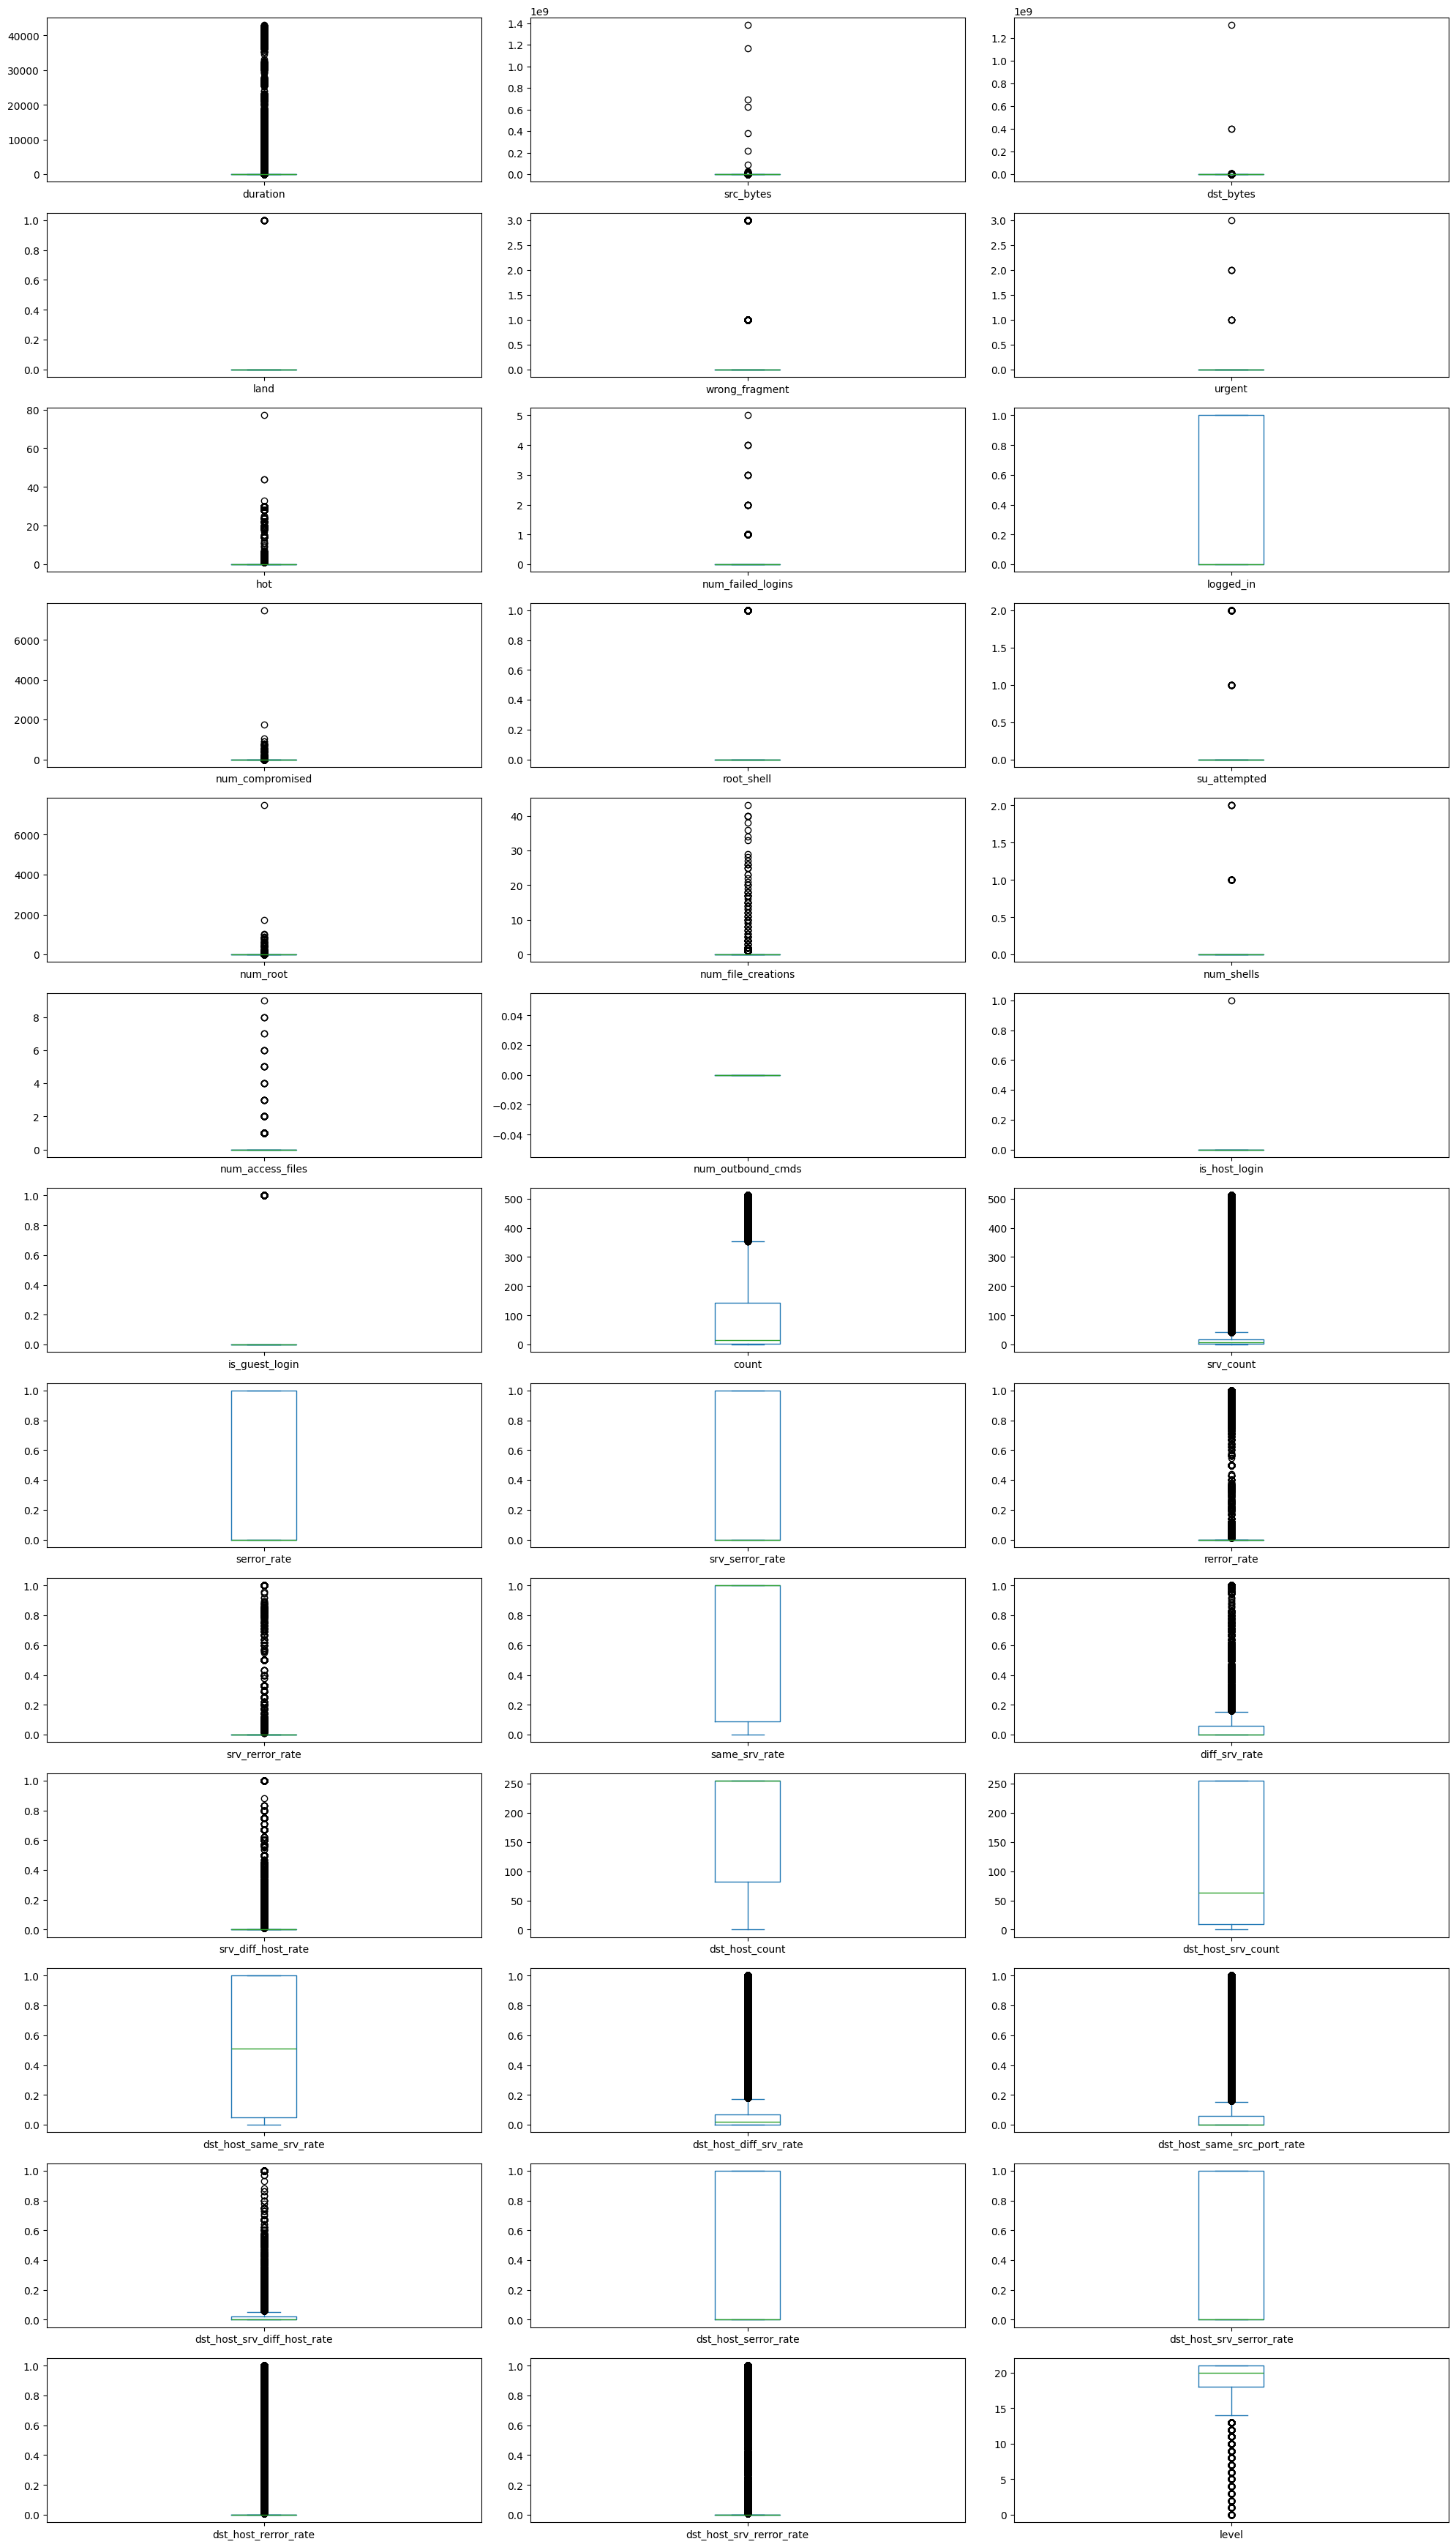

In [ ]:
import matplotlib.pyplot as plt

# Plot box plots for all numerical features in the train dataset
#This code snippet is generating box plots for all numerical features in the train_df DataFrame,
#helping to visualize the distribution and potential outliers in the data
train_df.plot(kind='box', subplots=True, layout=(15, 3), figsize=(20, 40))
plt.tight_layout()
plt.show()


In [ ]:
#is used to count the occurrences of each unique value in the attack column of the train_df DataFrame.
train_df['attack'].value_counts()

,count
attack,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [ ]:
# Convert 'attack' to binary classification

train_df['binary_attack'] = train_df.attack.map(lambda a: "normal" if a == 'normal' else "abnormal")
train_df.drop('attack', axis=1, inplace=True)

test_df['binary_attack'] = test_df.attack.map(lambda a: "normal" if a == 'normal' else "abnormal")
test_df.drop('attack', axis=1, inplace=True)


Encoding


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# is used to concatenate both train_df and test_df along the rows
#This is typically done if you want to apply the same transformation to both training and testing data
combined_df = pd.concat([train_df, test_df], axis=0)

#categorical (non-numeric) labels into numeric values.
le = LabelEncoder()
for column in ['protocol_type', 'service', 'flag', 'binary_attack']:
    combined_df[column] = le.fit_transform(combined_df[column])


Splitting training data and testing data

In [ ]:
# Split back into train and test sets
train_df = combined_df.iloc[:len(train_df), :]
test_df = combined_df.iloc[len(train_df):, :]

# Splitting features and target variable
x_train = train_df.drop('binary_attack', axis=1)
y_train = train_df['binary_attack']
x_test = test_df.drop('binary_attack', axis=1)
y_test = test_df['binary_attack']

Graphs

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

,0
src_bytes,0.566238
service,0.469077
dst_bytes,0.439806
flag,0.369076
same_srv_rate,0.367375
diff_srv_rate,0.359909
dst_host_srv_count,0.338141
dst_host_same_srv_rate,0.310944
logged_in,0.294283
dst_host_serror_rate,0.286376


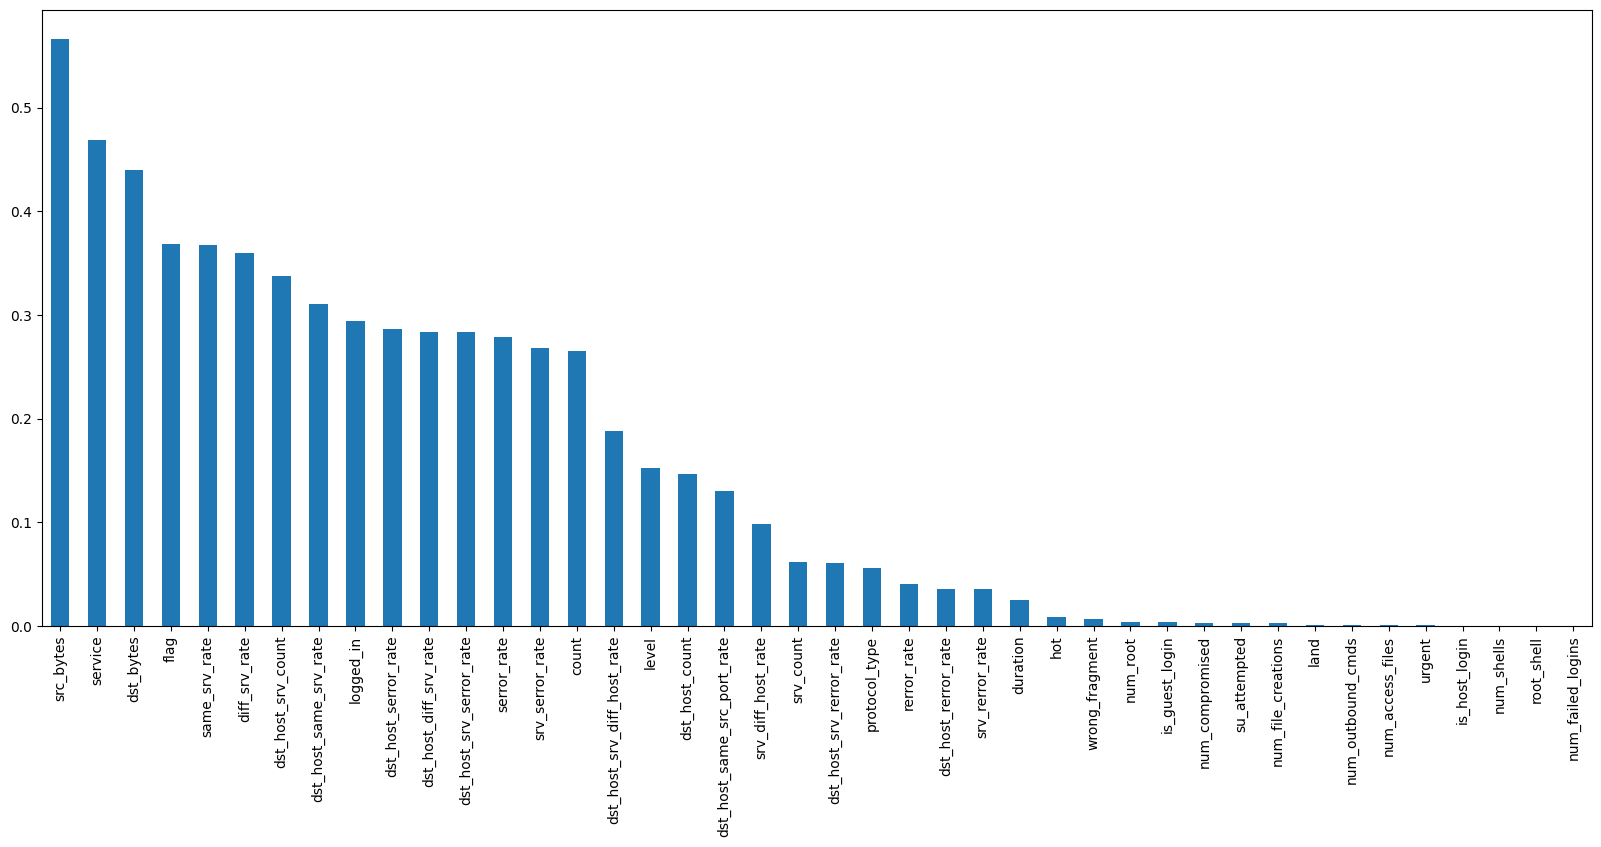

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [ ]:
col=['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate']
x_train=x_train[col]
x_test=x_test[col]

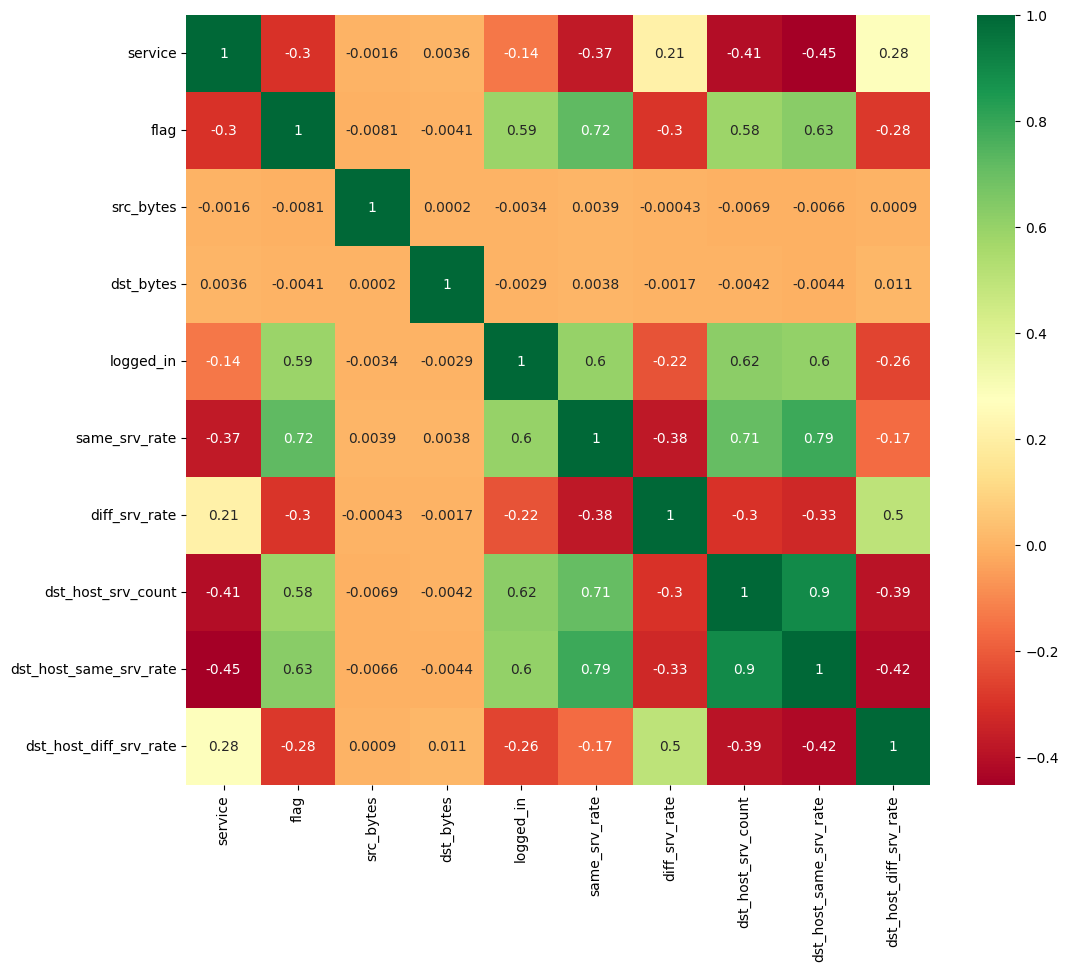

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(x_train.corr(), annot=True,cmap ='RdYlGn')

Scaling


In [ ]:
# Scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Testing and Evaluation:** Binary classification model


In [ ]:
# we'll initialize each model and store it by name in a dictionary
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines linear'] = LinearSVC()
models['Support Vector Machines plonomial'] = SVC(kernel='poly')
models['Support Vector Machines RBf'] =  SVC(C=100.0)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier(max_depth=3)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=20)

                                    Accuracy  Precision    Recall
Logistic Regression                 0.716776   0.810013  0.716776
Support Vector Machines linear      0.723740   0.820698  0.723740
Support Vector Machines polynomial  0.760601   0.833308  0.760601
Support Vector Machines RBF         0.816270   0.855984  0.816270
Decision Trees                      0.777990   0.836621  0.777990
Random Forest                       0.764106   0.837946  0.764106
Naive Bayes                         0.722143   0.834101  0.722143
K-Nearest Neighbor                  0.793116   0.850543  0.793116


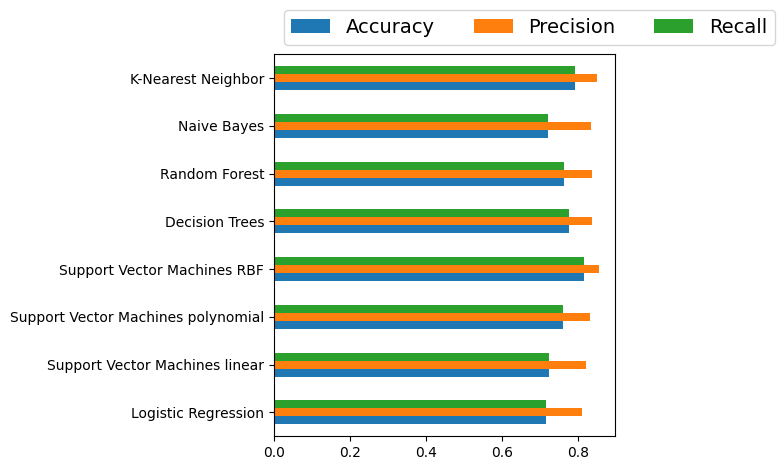

In [ ]:
# Initialize each model and store it by name in a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machines linear': LinearSVC(),
    'Support Vector Machines polynomial': SVC(kernel='poly'),
    'Support Vector Machines RBF': SVC(C=100.0),
    'Decision Trees': DecisionTreeClassifier(max_depth=3),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbor': KNeighborsClassifier(n_neighbors=20)
}

# Train and evaluate each model
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    # Fit the classifier
    models[key].fit(x_train, y_train)

    # Make predictions
    predictions = models[key].predict(x_test)

    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

# Display results
import pandas as pd

results_df = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
})

print(results_df)

# Create a DataFrame for the metrics
df_metrics = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
})

# Plot the bar chart for model metrics
ax = df_metrics.plot.barh()
ax.legend(ncol=len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.datasets import make_classification

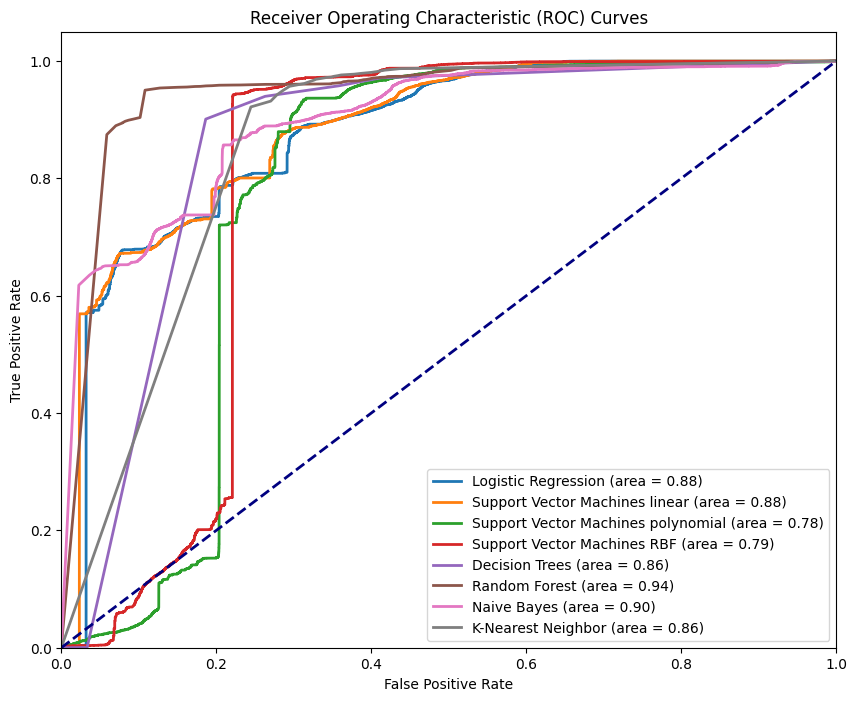

In [ ]:
# Train and evaluate each model (replace with your actual training and evaluation steps)
for name, model in models.items():
    model.fit(x_train, y_train)

# Plot ROC curve
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
        prob_pos = model.predict_proba(x_test)[:, 1]
    else:  # Use decision function for SVC models
        prob_pos = model.decision_function(x_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fpr, tpr, _ = roc_curve(y_test, prob_pos)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

**Conclusion:** Thus according to the data, Support Vector Machines RBF is the best classifier achieving the highest accuracy, precision, and recall.


<u> **EDA** </u>

**Importing Libraries:**numpy, pandas, matplotlib,pyplot, seaborn, sklearn
(various modules), scipy <br><br>

**Data Preprocessing:**Info of the dataset, checking for null values and converting apt columns to numeric types <br><br>

**Model Training:**Checking for Outliers ,converting 'attack' to binary classification,Label Encoding, Splitting data back into training and testing datasets ,graphs and scaling. <br><br>

**Model Testing:** using Binary Classification Models. Training and evaluating multiple models (Logistic Regression, SVM, Decision Trees, Random Forest, Naive Bayes, K-Nearest Neighbor).<br><br>


**Evaluation based on Compare Metrics:**

Accuracy: Indicates the overall correctness of the model.<br>
Precision: Measures the accuracy of the positive predictions.<br>
Recall: Measures the ability of the model to capture all positive instances.<br>
ROC Curve: Evaluating model performance through ROC curves and calculating the Area Under the Curve (AUC).